In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import AllKNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import preprocessing
%matplotlib inline
import itertools
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing 



In [66]:
df_train = pd.read_csv("creditcard.csv")

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [68]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
df_train.corr().round(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [71]:
df_train.shape

(284807, 31)

In [72]:
df_train["Class"].unique()

array([0, 1], dtype=int64)

In [73]:
df_train["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Highly imbalanced dataset with 99.8% belonging to class 0 

In [74]:
train_data, test_data = train_test_split(df_train,
                                   test_size=0.20,
                                   random_state=16)

print('No interactions on Train set: %d' % len(train_data))
print('No interactions on Test set: %d' % len(test_data))

No interactions on Train set: 227845
No interactions on Test set: 56962


In [76]:
train_data_Y = train_data["Class"]
train_data_X = train_data.drop(["Class"], axis=1)

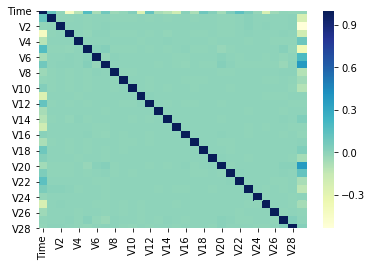

In [77]:
sns.heatmap(train_data_X.corr(), cmap="YlGnBu") 

In [78]:
print(len(train_data_X))
print(len(train_data_Y))


227845
227845


In [79]:
test_data_Y = test_data["Class"]
test_data_X = test_data.drop(["Class"], axis=1)

# Case 1 - LOGISTIC REGRESSION

In [229]:
lr = LogisticRegression()

In [230]:
lr.fit(train_data_X,train_data_Y)

C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
predictions = lr.predict(test_data_X)

In [232]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9989993328885924
Recall - 0.7010309278350515
precision - 0.7083333333333334
f1_score - 0.7046632124352332


In [233]:
accuracy1 = accuracy_score(test_data_Y,predictions)
recall1 = recall_score(test_data_Y,predictions)
precision1 = precision_score(test_data_Y,predictions)
f1score1 = f1_score(test_data_Y,predictions)

In [234]:
roc1 = roc_auc_score(test_data_Y, predictions)
print(roc1)

0.8502692667839639


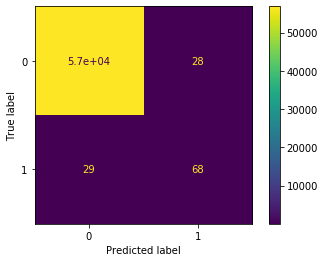

In [235]:
plot_confusion_matrix(lr,test_data_X,test_data_Y)

# Case 2 - LOGISTIC REGRESSION WITH MINMAXSCALER

In [236]:
min_max = preprocessing.MinMaxScaler()
scale_train_data_X = min_max.fit_transform(train_data_X)


In [237]:
train_data_Y2 = train_data_Y
train_data_X2 = scale_train_data_X

In [238]:
lr = LogisticRegression()
lr.fit(train_data_X2,train_data_Y2)
predictions = lr.predict(test_data_X)


In [239]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.0017028896457287315
Recall - 1.0
precision - 0.0017028896457287315
f1_score - 0.0033999894845686044


In [240]:
accuracy2 = accuracy_score(test_data_Y,predictions)
recall2 = recall_score(test_data_Y,predictions)
precision2 = precision_score(test_data_Y,predictions)
f1score2 = f1_score(test_data_Y,predictions)

In [241]:
roc2 = roc_auc_score(test_data_Y, predictions)
print(roc2)

0.5


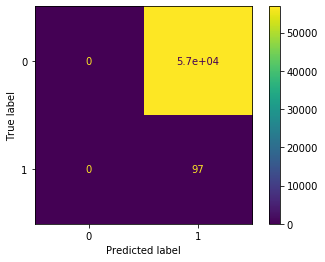

In [242]:
plot_confusion_matrix(lr,test_data_X,test_data_Y)


# Case 3 WITH DECISION TREE


In [243]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf.fit(train_data_X,train_data_Y)

In [244]:
predictions = clf3.predict(test_data_X)

In [245]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9991924440855307
Recall - 0.865979381443299
precision - 0.717948717948718
f1_score - 0.7850467289719626


In [246]:
accuracy3 = accuracy_score(test_data_Y,predictions)
recall3 = recall_score(test_data_Y,predictions)
precision3 = precision_score(test_data_Y,predictions)
f1score3 = f1_score(test_data_Y,predictions)

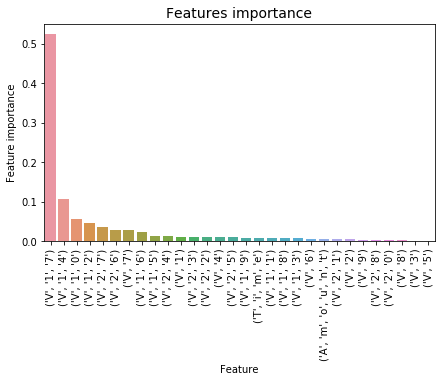

In [247]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf3.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


In [248]:
roc3 = roc_auc_score(test_data_Y, predictions)
print(roc3)

0.9326995298142372


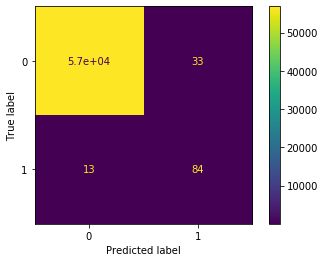

In [249]:
plot_confusion_matrix(clf3,test_data_X,test_data_Y)

In [250]:
# tune there parameters
# dont use decision tree regressor


# Case 5 Random Forest

In [251]:
clf5 = RandomForestClassifier(random_state=32)

In [252]:
clf5.fit(train_data_X,train_data_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [253]:
predictions = clf5.predict(test_data_X)

In [254]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9996137776061234
Recall - 0.845360824742268
precision - 0.9213483146067416
f1_score - 0.8817204301075268


In [255]:
accuracy5 = accuracy_score(test_data_Y,predictions)
recall5 = recall_score(test_data_Y,predictions)
precision5 = precision_score(test_data_Y,predictions)
f1score5 = f1_score(test_data_Y,predictions)

In [256]:
roc5 = roc_auc_score(test_data_Y, predictions)
print(roc5)

0.9226188630877437


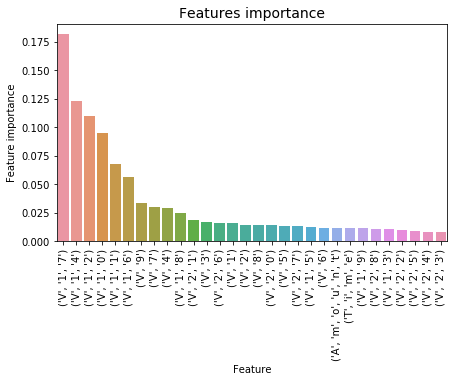

In [257]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf5.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


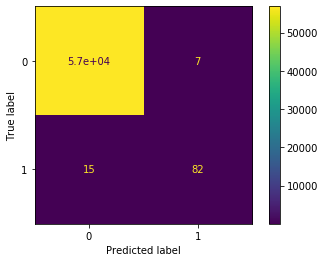

In [258]:
plot_confusion_matrix(clf5,test_data_X,test_data_Y)

# Case 6 Random forest grid searchCV

In [225]:
clf6 = RandomForestClassifier(random_state=32)

In [226]:
param_grid = { 
    'n_estimators': [100,250,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,50,80],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
}

In [227]:
res = GridSearchCV(estimator=clf6, param_grid=param_grid)

In [228]:
res.fit(train_data_X,train_data_Y)

KeyboardInterrupt: 

In [ ]:
res.best_params_

In [ ]:
final_res=RandomForestClassifier(random_state=42, max_features=?, n_estimators= ?, max_depth=?, criterion=?)

In [ ]:
final_res.fit(train_data_X, train_data_Y)

In [ ]:
predictions=final_res.predict(x_test)

In [ ]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

In [ ]:
accuracy6 = accuracy_score(test_data_Y,predictions)
recall6 = recall_score(test_data_Y,predictions)
precision6 = precision_score(test_data_Y,predictions)
f1score6 = f1_score(test_data_Y,predictions)

In [ ]:
roc6 = roc_auc_score(test_data_Y, predictions)
print(roc6)

In [ ]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf5.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


In [ ]:
plot_confusion_matrix(final_res,test_data_X,test_data_Y)


# Case 7 Random Forest using SMOTE

In [259]:
train_data_X_7, train_data_Y_7 = SMOTE().fit_resample(train_data_X,train_data_Y)

In [260]:
clf7 = RandomForestClassifier(random_state=32)

In [261]:
clf7.fit(train_data_X_7,train_data_Y_7)
predictions = clf7.predict(test_data_X)

In [262]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9996137776061234
Recall - 0.8865979381443299
precision - 0.8865979381443299
f1_score - 0.8865979381443299


In [263]:
accuracy7 = accuracy_score(test_data_Y,predictions)
recall7 = recall_score(test_data_Y,predictions)
precision7 = precision_score(test_data_Y,predictions)
f1score7 = f1_score(test_data_Y,predictions)

In [264]:
roc7 = roc_auc_score(test_data_Y, predictions)
print(roc7)

0.9432022487696942


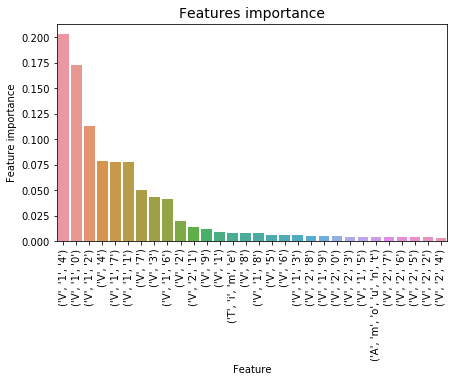

In [265]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf7.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


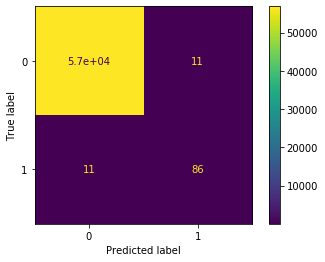

In [266]:
plot_confusion_matrix(clf7,test_data_X,test_data_Y)

# Case 8 Random Forest using ADASYN

In [267]:
train_data_X_8, train_data_Y_8 = ADASYN().fit_resample(train_data_X,train_data_Y)

In [268]:
clf8 = RandomForestClassifier(random_state=32)

In [269]:
clf8.fit(train_data_X_8,train_data_Y_8)
predictions = clf8.predict(test_data_X)

In [270]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9995786664794073
Recall - 0.8762886597938144
precision - 0.8762886597938144
f1_score - 0.8762886597938144


In [271]:
accuracy8 = accuracy_score(test_data_Y,predictions)
recall8 = recall_score(test_data_Y,predictions)
precision8 = precision_score(test_data_Y,predictions)
f1score8 = f1_score(test_data_Y,predictions)

In [272]:
roc8 = roc_auc_score(test_data_Y, predictions)
print(roc8)

0.9380388168396664


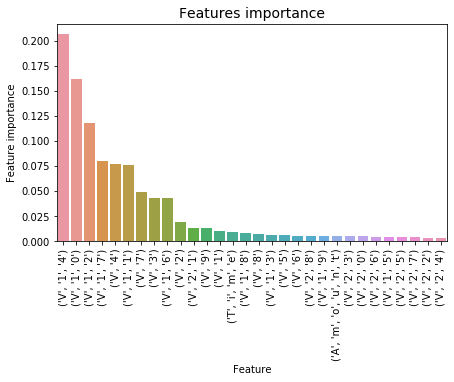

In [273]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf8.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


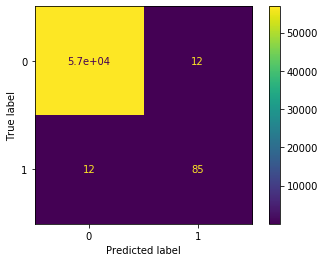

In [274]:
plot_confusion_matrix(clf8,test_data_X,test_data_Y)

# Case 9 Random Forest using Allknn

In [275]:
allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(train_data_X, train_data_Y)

In [276]:
clf9 = RandomForestClassifier(n_estimators=100, random_state=0)
clf9.fit(X_resampled, y_resampled) 
predictions = clf9.predict(test_data_X)


In [277]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9996137776061234
Recall - 0.8350515463917526
precision - 0.9310344827586207
f1_score - 0.8804347826086957


In [278]:
accuracy9 = accuracy_score(test_data_Y,predictions)
recall9 = recall_score(test_data_Y,predictions)
precision9 = precision_score(test_data_Y,predictions)
f1score9 = f1_score(test_data_Y,predictions)

In [279]:
roc9 = roc_auc_score(test_data_Y, predictions)
print(roc9)

0.917473016667256


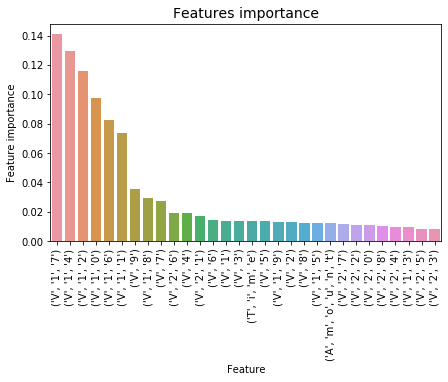

In [280]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf9.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


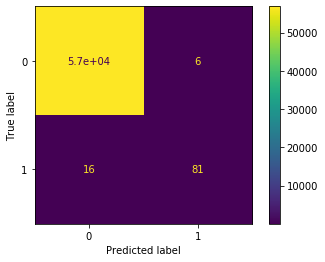

In [281]:
plot_confusion_matrix(clf9,test_data_X,test_data_Y)

# Case 10 Adaboost

In [282]:
clf10 = AdaBoostClassifier()

In [283]:
clf10.fit(train_data_X,train_data_Y)
predictions = clf10.predict(test_data_X)


In [284]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9993328885923949
Recall - 0.7731958762886598
precision - 0.8241758241758241
f1_score - 0.7978723404255318


In [285]:
accuracy10 = accuracy_score(test_data_Y,predictions)
recall10 = recall_score(test_data_Y,predictions)
precision10 = precision_score(test_data_Y,predictions)
f1score10 = f1_score(test_data_Y,predictions)

In [286]:
roc10 = roc_auc_score(test_data_Y, predictions)
print(roc10)

0.8864572540680087


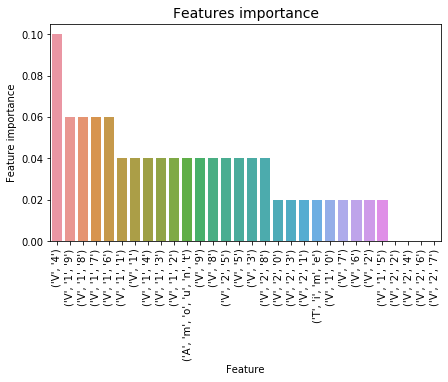

In [287]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf10.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


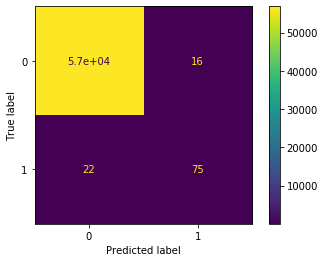

In [288]:
plot_confusion_matrix(clf10,test_data_X,test_data_Y)

# Case 11 Cat-boost-classifier

In [289]:
clf11 = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 32,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [290]:
clf11.fit(train_data_X,train_data_Y)

0:	total: 1000ms	remaining: 8m 18s
50:	total: 48.9s	remaining: 7m 10s
100:	total: 1m 35s	remaining: 6m 18s
150:	total: 2m 22s	remaining: 5m 28s
200:	total: 3m 7s	remaining: 4m 39s
250:	total: 3m 52s	remaining: 3m 50s
300:	total: 4m 37s	remaining: 3m 3s
350:	total: 5m 23s	remaining: 2m 17s
400:	total: 6m 7s	remaining: 1m 30s
450:	total: 6m 53s	remaining: 44.9s
499:	total: 7m 40s	remaining: 0us


In [291]:
predictions = clf11.predict(test_data_X)

In [292]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9995786664794073
Recall - 0.845360824742268
precision - 0.9010989010989011
f1_score - 0.8723404255319148


In [293]:
accuracy11 = accuracy_score(test_data_Y,predictions)
recall11 = recall_score(test_data_Y,predictions)
precision11 = precision_score(test_data_Y,predictions)
f1score11 = f1_score(test_data_Y,predictions)

In [294]:
roc11 = roc_auc_score(test_data_Y, predictions)
print(roc11)

0.9226012775782034


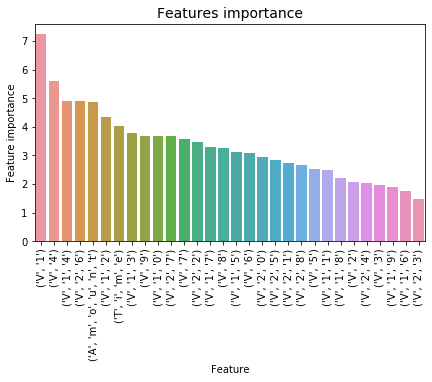

In [295]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf11.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

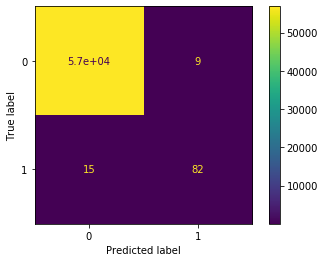

In [296]:
plot_confusion_matrix(clf11,test_data_X,test_data_Y)

# Case12 XGB-classifier

In [297]:
clf12 = XGBClassifier()
clf12.fit(train_data_X, train_data_Y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [298]:
y_pred = clf12.predict(test_data_X)
predictions = [round(value) for value in y_pred]

In [299]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9996137776061234
Recall - 0.8350515463917526
precision - 0.9310344827586207
f1_score - 0.8804347826086957


In [300]:
accuracy12 = accuracy_score(test_data_Y,predictions)
recall12 = recall_score(test_data_Y,predictions)
precision12 = precision_score(test_data_Y,predictions)
f1score12 = f1_score(test_data_Y,predictions)

In [301]:
roc12 = roc_auc_score(test_data_Y, predictions)
print(roc12)

0.917473016667256


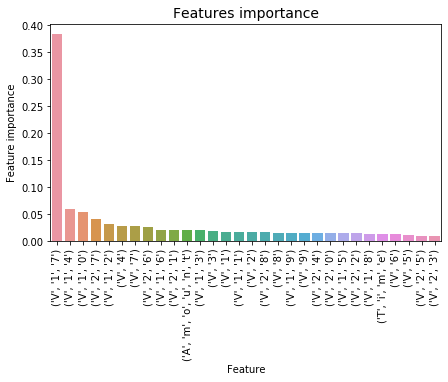

In [302]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf12.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

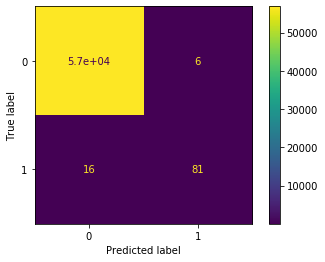

In [303]:
plot_confusion_matrix(clf12,test_data_X,test_data_Y)

# Case 13 Lightgbm

In [304]:
clf13 = LGBMClassifier()
clf13.fit(train_data_X, train_data_Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [305]:
predictions = clf13.predict(test_data_X)

In [306]:
print("Accuracy - " + str(accuracy_score(test_data_Y,predictions)))
print("Recall - " + str(recall_score(test_data_Y,predictions)))
print("precision - " + str(precision_score(test_data_Y,predictions)))
print("f1_score - " + str(f1_score(test_data_Y,predictions)))

Accuracy - 0.9979108879603946
Recall - 0.5257731958762887
precision - 0.4112903225806452
f1_score - 0.46153846153846156


In [307]:
accuracy13 = accuracy_score(test_data_Y,predictions)
recall13 = recall_score(test_data_Y,predictions)
precision13 = precision_score(test_data_Y,predictions)
f1score13 = f1_score(test_data_Y,predictions)

In [308]:
roc13 = roc_auc_score(test_data_Y, predictions)
print(roc13)

0.7622447268399293


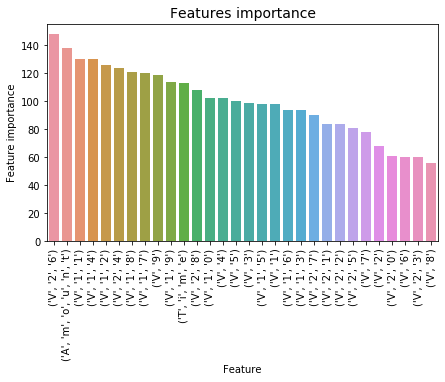

In [309]:
tmp = pd.DataFrame({'Feature': test_data_X, 'Feature importance': clf13.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

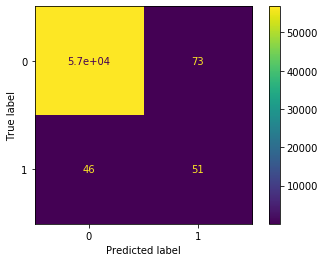

In [310]:
plot_confusion_matrix(clf13,test_data_X,test_data_Y)

# Plot for different ROC_AUC score

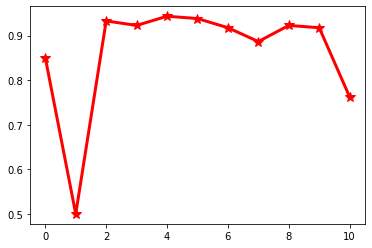

In [311]:
list_of_roc = [roc1,roc2,roc3,roc5,roc7,roc8,roc9,roc10,roc11,roc12,roc13]
plt.plot(list_of_roc, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for accuracy

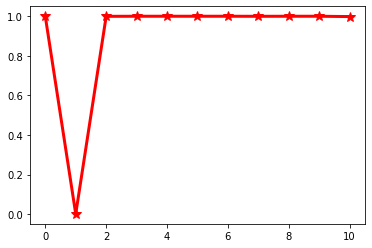

In [312]:
list_of_accuracy = [accuracy1,accuracy2,accuracy3,accuracy5,accuracy7,accuracy8,accuracy9,accuracy10,accuracy11,accuracy12,accuracy13]
plt.plot(list_of_accuracy, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for recall

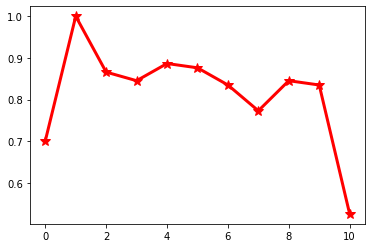

In [313]:
list_of_recall = [recall1,recall2,recall3,recall5,recall7,recall8,recall9,recall10,recall11,recall12,recall13]
plt.plot(list_of_recall, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for precision

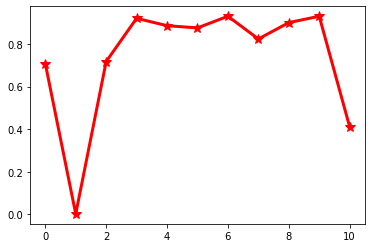

In [314]:
list_of_precision = [precision1,precision2,precision3,precision5,precision7,precision8,precision9,precision10,precision11,precision12,precision13]
plt.plot(list_of_precision, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)

# Plot for f1score

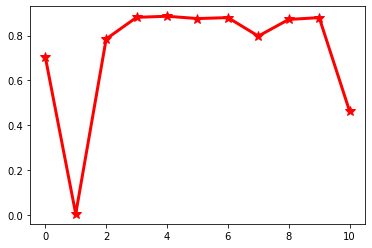

In [315]:
list_of_f1score = [f1score1,f1score2,f1score3,f1score5,f1score7,f1score8,f1score9,f1score10,f1score11,f1score12,f1score13]
plt.plot(list_of_f1score, color='r', linestyle='solid', marker='*', linewidth=3, markersize=10)